In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def IMF(m, mtrunc):
    return np.exp(-m/mtrunc)/m**2

def envelope(m):
    return m**(-2)

def inverse_CDF_envelope(u, norm, min):
    return 1/(1/min - u/norm)

def trapz_log(min, max, mtrunc, IMF, n):
    integral = 0.
    h = (np.log10(max) - np.log10(min))/n
    low = np.log10(min)
    for i in range(1, n):
        current = 10**(low + i*h)
        next = 10**(low + (i+1)*h)
        dx = abs(current - next)
        integral += 0.5*dx*(IMF(current, mtrunc) + IMF(next, mtrunc))
    return integral

In [3]:
def draw_mass(min, max, mtrunc, ax, Nreg, norm):
    # cnt1 = True
    # cnt2 = True
    u = np.random.uniform()
    env_norm = 1/(1/min - 1/max)
    guess1 = inverse_CDF_envelope(u, env_norm, min)

    guess2 = np.random.uniform()
    if (norm*IMF(min, mtrunc) > env_norm*envelope(min)):
        scale_factor = (norm * IMF(min, mtrunc))/(env_norm * envelope(min))
    else:
        scale_factor = 1.

    criterion = norm*IMF(guess1, mtrunc)/(scale_factor * env_norm*envelope(guess1))
    # criterion = IMF(10**guess1, mtrunc)/IMF(min, mtrunc)
    
    # if (np.log10(IMF(max, mtrunc))>-300.):
    #     guess2 = np.random.uniform(low=np.log10(IMF(max, mtrunc)), high=np.log10(IMF(min, mtrunc)))
    # else:
    #     guess2 = np.random.uniform(low=-300., high=np.log10(IMF(min, mtrunc)))


    if (guess2<criterion):
        # if cnt1:
        #     ax.plot(guess1, scale_factor * env_norm * guess2 * envelope(guess1), 'xg', label='Accepdet')
        #     cnt1 = False
        # else:
        ax.plot(guess1, scale_factor * env_norm * guess2 * envelope(guess1), 'xg')

        # ax.plot(10**guess1, norm * guess2 * IMF(min, mtrunc), 'xg')
        return guess1, Nreg
    else:
        Nreg += 1
        # if cnt2:
        #     ax.plot(guess1, scale_factor * env_norm * guess2 * envelope(guess1), '.r', label='Rejected')
        #     cnt2 = False
        # else:
        ax.plot(guess1, scale_factor * env_norm * guess2 * envelope(guess1), '.r')
        # ax.plot(10**guess1, norm * guess2 * IMF(min, mtrunc), '.r')
        return draw_mass(min, max, mtrunc, ax, Nreg, norm)

In [4]:
# Msun = 1.989e33
low = 1e2#*Msun
high = 1e8#*Msun
mtrunc = 1e5#*Msun

marray = np.logspace(np.log10(low), np.log10(high), 10000)
IMFarray = IMF(marray, mtrunc)

norm = 1/trapz_log(low, high, mtrunc, IMF, 10000)

# print("Norm: {:.2f}".format(norm))

Envarray = envelope(marray)
env_norm = 1/(1/low - 1/high)

# Unfarray = IMF(low, mtrunc)*np.ones(10000)

In [5]:
if (norm*IMF(low, mtrunc) > env_norm*envelope(low)):
    scale_factor = (norm * IMF(low, mtrunc))/(env_norm * envelope(low))
else:
    scale_factor = 1.

# plt.loglog(marray, norm * IMFarray)
# plt.loglog(marray, scale_factor * env_norm * Envarray)
# plt.loglog(marray, Unfarray)

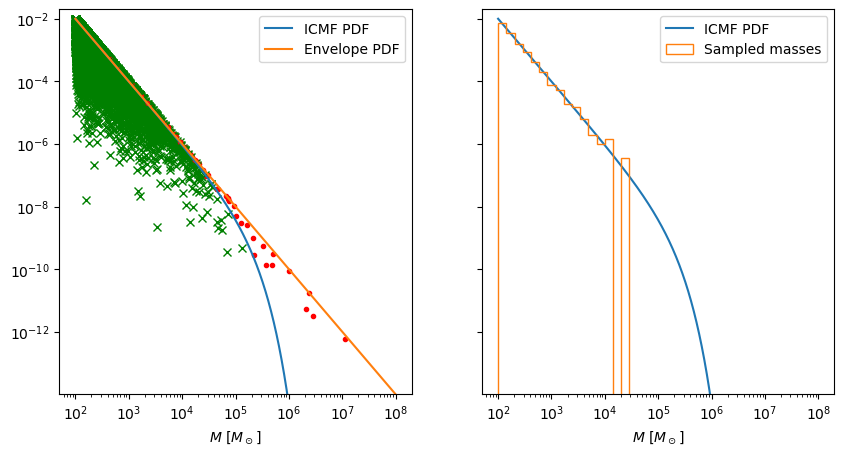

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)

Nreg = 0
masses = []
for i in range(10000):
    drawn, Nreg = draw_mass(low, high, mtrunc, ax[0], Nreg, norm)
    if(np.random.uniform() > 0.9):
        masses.append(drawn)
masses = np.array(masses)

ax[0].loglog(marray, norm * IMFarray, label='ICMF PDF')
ax[0].loglog(marray, scale_factor * env_norm * Envarray, label='Envelope PDF')
ax[0].set(xscale='log', yscale='log')
ax[0].set(ylim=(env_norm * envelope(high), 2e-2))
ax[0].legend(loc='upper right')
ax[0].set(xlabel=r'$M$ [$M_\odot$]')

bins = np.logspace(np.log10(low), np.log10(high), 40)
ax[1].loglog(marray, norm*IMFarray, label = 'ICMF PDF')
ax[1].hist(masses, bins=bins, histtype='step', density=True, label='Sampled masses')
ax[1].legend(loc='upper right')
ax[1].set(xlabel=r'$M$ [$M_\odot$]')

plt.savefig("IMF_sampling.pdf")

In [21]:
Nreg

78

In [22]:
masses.size

989

# Inverse Sampling trial with known distribution

In [10]:
dist = []
for i in range(10000):
    u = np.random.uniform()
    m = inverse_CDF_envelope(u, env_norm, low)
    dist.append(m)

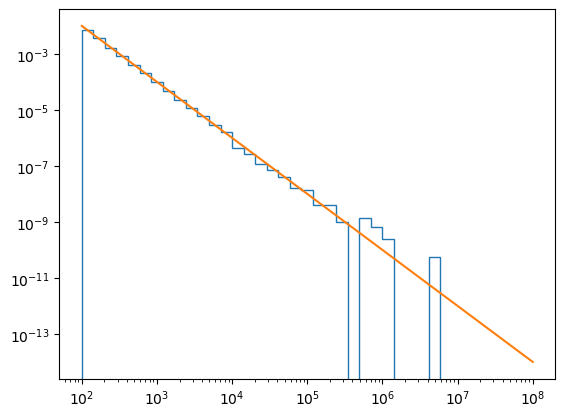

In [11]:
plt.hist(dist, bins=bins, histtype='step', density=True)
plt.loglog(marray, env_norm * Envarray)